=== Árbol de Decisión ===
Accuracy: 0.799

Matriz de confusión:
 [[96  9]
 [27 47]]

Reporte:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179


Importancias (árbol):
 Sex           0.580
Pclass        0.200
Fare          0.081
Age           0.076
SibSp         0.046
Embarked_S    0.014
Parch         0.002
Embarked_Q    0.000
dtype: float64


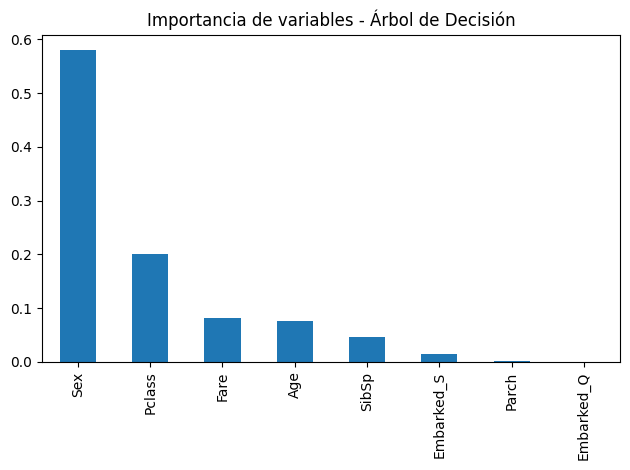

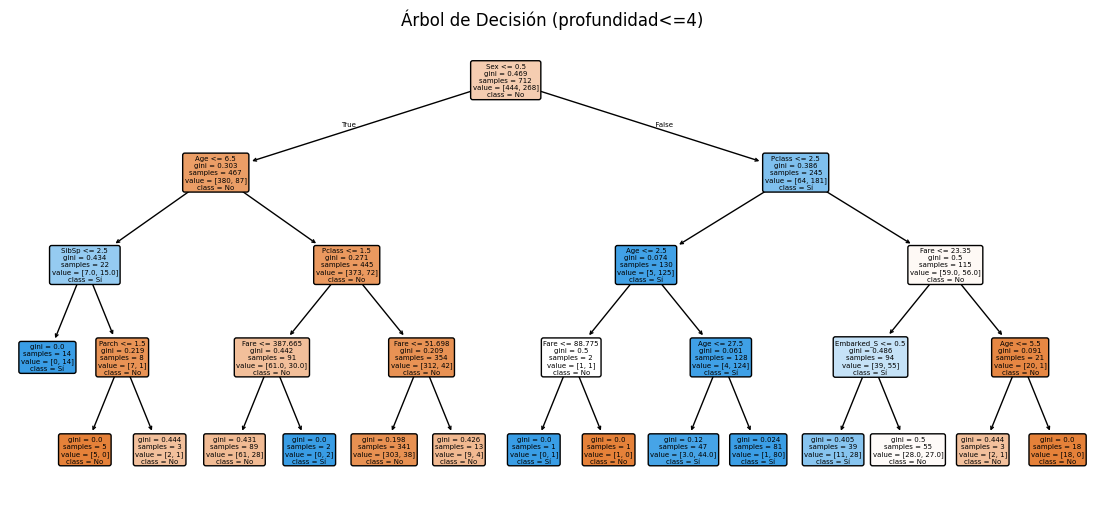


=== Random Forest ===
Accuracy: 0.81

Matriz de confusión:
 [[94 11]
 [23 51]]

Reporte:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Importancias (Random Forest):
 Sex           0.451
Fare          0.180
Pclass        0.136
Age           0.113
SibSp         0.050
Parch         0.037
Embarked_S    0.025
Embarked_Q    0.009
dtype: float64


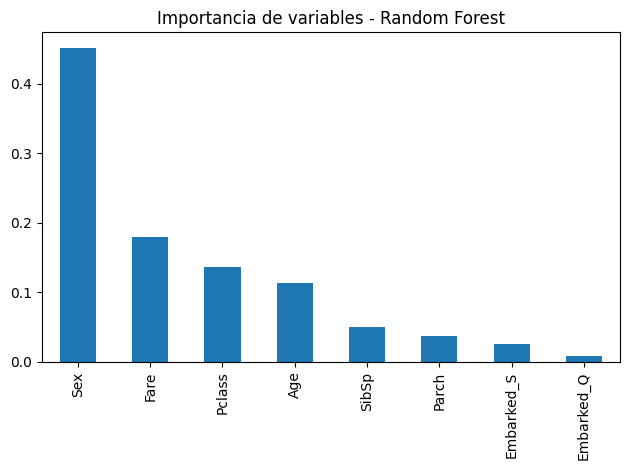

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el csv
pc = pd.read_csv("../data/train.csv")

pc = pc.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
pc["Age"] = pc["Age"].fillna(pc["Age"].mean())
pc["Embarked"] = pc["Embarked"].fillna(pc["Embarked"].mode()[0])
pc["Sex"] = pc["Sex"].map({"male": 0, "female": 1})
pc = pd.get_dummies(pc, columns=["Embarked"], drop_first=True)

X = pc.drop("Survived", axis=1)
y = pc["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== 2) Árbol de Decisión =====
arbol = DecisionTreeClassifier(
    max_depth=4,         # limita profundidad para evitar sobreajuste
    random_state=42
)
arbol.fit(X_train, y_train)
y_pred_tree = arbol.predict(X_test)

print("=== Árbol de Decisión ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_tree), 3))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_tree))
print("\nReporte:\n", classification_report(y_test, y_pred_tree))

# Importancias del árbol
imp_tree = pd.Series(arbol.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancias (árbol):\n", imp_tree.round(3))

imp_tree.plot(kind="bar")
plt.title("Importancia de variables - Árbol de Decisión")
plt.tight_layout(); plt.show()

# (Opcional) dibujar el árbol
plt.figure(figsize=(14,6))
plot_tree(arbol, feature_names=X.columns, class_names=["No","Sí"], filled=True, rounded=True)
plt.title("Árbol de Decisión (profundidad<=4)")
plt.show()

# ===== 3) Random Forest =====
rf = RandomForestClassifier(
    n_estimators=200,    # nº de árboles
    max_depth=5,         # controla complejidad
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte:\n", classification_report(y_test, y_pred_rf))

# Importancias del bosque
imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancias (Random Forest):\n", imp_rf.round(3))

imp_rf.plot(kind="bar")
plt.title("Importancia de variables - Random Forest")
plt.tight_layout(); plt.show()
